In [118]:
import numpy as np
import matplotlib.pyplot as plt

#### Weight updates for the different learning rules

In [119]:
def delta_seq(patterns,targets,W,lr):
    n_error = 0
    for i in range(0,patterns.shape[1]):
        error = np.dot(patterns[:,i],W) - targets[i]
        if np.abs(error) > 1:
            n_error+=1
        delta = - lr * error * patterns[:,i]
        W += delta
    error_rate = n_error/200
    return W, error_rate

def step(x):
    if x>0:
        return 1
    else:
        return 0

def perceptron_seq(patterns,targets,W,lr):
    n_error = 0
    for i in range(0,patterns.shape[1]):
        y = step(np.dot(patterns[:,i],W))
        if y != (targets[i]+1)//2:
            n_error += 1
        delta = - lr * (y-targets[i]) * patterns[:,i]
        W += delta
    error_rate = n_error/200
    return W, error_rate

def delta_batch(patterns,targets,W,lr):
    error = W @ patterns - targets
    error_rate = np.sum(np.array([1 if np.abs(e)>1 else 0 for e in error]))/len(error)
    delta = -lr * error @ patterns.T
    return W + delta, error_rate

#### Initialize and define stuff

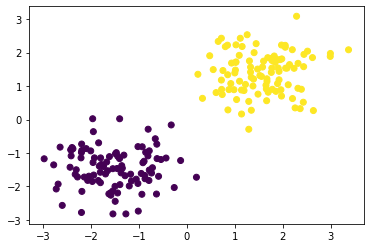

In [131]:
np.random.seed(41)
def generate_data(n_points,mean_a,mean_b,sigma):
    # Create and plot dataset
    assert n_points%2 == 0
    data = np.ones((3,n_points))
    data[0:2,:n_points//2] = np.random.multivariate_normal(mean_a,[[sigma,0],[0,sigma]],n_points//2).T
    data[0:2,n_points//2:] = np.random.multivariate_normal(mean_b,[[sigma,0],[0,sigma]],n_points//2).T

    target=np.ones(n_points)
    target[n_points//2:]=-1

    plt.scatter(data[0,:],data[1,:], c=target)

    p = np.random.permutation(target.shape[0])
    data = data[:,p]
    target = target[p]
    return data, target

data, target = generate_data(200,[1.5,1.5],[-1.5,-1.5],0.4)


In [121]:
def plot_boundary(ax,W,lr):
    t = np.linspace(-3,3)
    if len(W) == 3:
        ax.plot(t, -((W[0]*t+W[2])/W[1]), label='lr='+str(lr))
    elif len(W) == 2:
        ax.plot(t, -W[0]*t/W[1], label='lr='+str(lr))

In [122]:
def learn_everything(data,target,W,epochs,save,path):
    # Create figures
    fig1,ax1 = plt.subplots()
    fig2,ax2 = plt.subplots()
    fig3,ax3 = plt.subplots()
    fig4,ax4 = plt.subplots()
    fig5,ax5 = plt.subplots()
    fig6,ax6 = plt.subplots()
    ax2.scatter(data[0,:],data[1,:], c=target)
    ax4.scatter(data[0,:],data[1,:], c=target)
    ax6.scatter(data[0,:],data[1,:],c=target)
    # Learn and plot 
    for lr in [1e-5,5e-5,1e-4,1e-3,5e-3]:
        W_delta_seq = W
        errors_delta_seq = np.zeros(epochs)
        W_perceptron_seq = W
        errors_perceptron_seq = np.zeros(epochs)
        W_delta_batch = W
        errors_delta_batch = np.zeros(epochs)
        for epoch in range(epochs):
            W_delta_seq, errors_delta_seq[epoch] = delta_seq(data,target,W_delta_seq,lr)
            W_perceptron_seq, errors_perceptron_seq[epoch] = perceptron_seq(data,target,W_perceptron_seq,lr)
            W_delta_batch, errors_delta_batch[epoch] = delta_batch(data,target,W_delta_batch,lr)   
        ax1.plot(range(epochs),errors_delta_seq,label='lr='+str(lr))
        plot_boundary(ax2,W_delta_seq,lr)
        ax3.plot(range(epochs),errors_perceptron_seq,label='lr='+str(lr))
        plot_boundary(ax4,W_perceptron_seq,lr)
        ax5.plot(range(epochs),errors_delta_batch,label='lr='+str(lr))
        plot_boundary(ax6,W_delta_batch,lr)

    # Format plots
    ax1.set_title('Delta rule, sequential learning')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Error rate')
    ax1.legend()
    ax2.set_title(f'Delta rule, sequential learning after {epochs} epochs')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.legend()
    ax2.set_ylim(-5,5)
    ax3.set_title('Perceptron rule, sequential learning')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Error rate')
    ax3.legend()
    ax4.set_title(f'Perceptron rule, sequential learning after {epochs} epochs')
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax4.legend()
    ax4.set_ylim(-5,5)
    ax5.set_title('Delta rule, batch learning')
    ax5.set_xlabel('Epoch')
    ax5.set_ylabel('Error rate')
    ax5.legend()
    ax6.set_title(f'Delta rule, batch learning after {epochs} epochs')
    ax6.set_xlabel('x')
    ax6.set_ylabel('y')
    ax6.legend()
    ax6.set_ylim(-5,5)
    if save:
        fig1.savefig(path+"delta_seq_error.png")
        fig2.savefig(path+"delta_seq_boundary.png")
        fig3.savefig(path+"perceptron_error.png")
        fig4.savefig(path+"perceptron_boundary.png")
        fig5.savefig(path+"delta_batch_error.png")
        fig6.savefig(path+"delta_batch_boundary.png")

#### 3.1.2 Part 1 and 2

In [ ]:
# Parameters
epochs = 30

# Compare all three learning strategies
W = np.random.normal(0,1,3)
learn_everything(data,target,W,epochs,True,"lab1a/img/1/")

# Repeat with different initial weights to test sensitivity
np.random.seed(50)
W = np.random.normal(0,1,3)
learn_everything(data,target,W,epochs,True,"lab1a/img/2/")

#### 3.1.2 Part 3

In [ ]:
# Remove bias -> already linearly seperable through the origin
np.random.seed(100)
W = np.random.normal(0,1,3)
learn_everything(data[:2,:],target,W[:2],epochs,True,"lab1a/img/3/")

# Move data points
data[:2,:] -= 1
W = np.random.normal(0,1,3)
learn_everything(data[:2,:],target,W[:2],epochs,True,"lab1a/img/4/")

#### 3.1.3 Part one

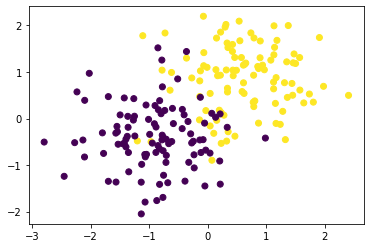

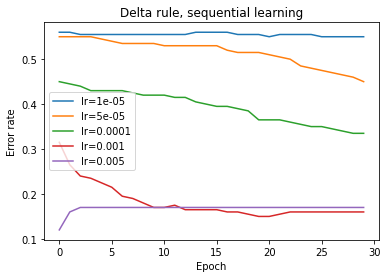

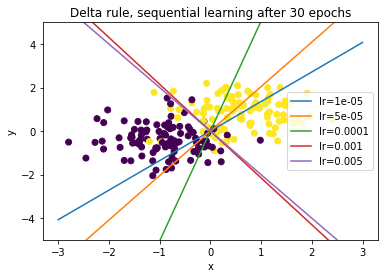

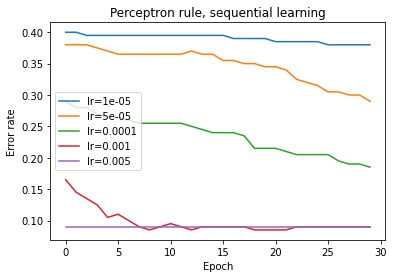

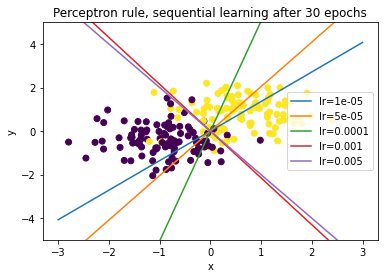

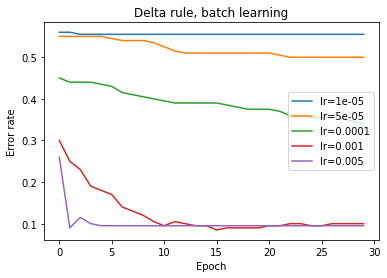

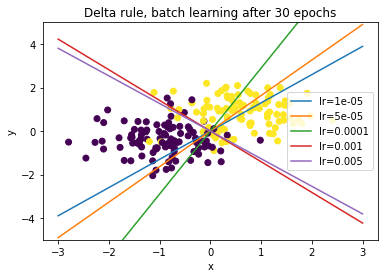

In [133]:
# Generate overlapping datasets
data, target = generate_data(200,[0.5,1],[-1,-.5],0.5)
W = np.random.normal(0,1,3)
learn_everything(data[:2,:],target,W[:2],epochs,True,"lab1a/img/5/")

# Move data points
# data[:2,:] -= 1
# W = np.random.normal(0,1,3)
# learn_everything(data[:2,:],target,W[:2],epochs,True,"lab1a/img/4/")